#### pandas 내장 그래프 도구
  -  판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 인포트하지 않고 간단히 그래프를 그릴 수 있음.
  -  선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
  -  막대그래프 : df.plot(kind = 'bar'), df.plot(kind = 'barh',stacked=True, alpha=0.8  #alpla > 농도
  -  히스토그램 : df.plot(kind = 'hist')
  -  산점도 : df.plot(x='',y='', kind = 'scatter'), 상관관계를 볼 수 있음.
  -  박스 플롯 : df.plot(kind = 'box'), df.boxplot(column = ['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 제공
#### matplotlib

  -  histogram : plt.hist(x, bins=)
  -  line plot : plt.plot(x,y)
  -  plt.bar(x,y,color = '')
  -  scatter plot :  plt.scatter(x,y)

#### seaborn
  -  sns.distplot(data. bins=, color=, kde=) 
  -  sns,boxplot(x,y,data,color)
  -  sns.violinplot(x,y,data,color)
  -  sns.barplot(x,y,data,color)
  -  sns.jointplot(x,y,data,color)
  -  sns.pairplot(data,hue,palette)
  -  sns.lmplot(x,y,data,color)
  -  sns.regplot(x,y,data,fig_reg=False)   >> 회귀모델
  

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [2]:
li = ['Date','Close','Start','High','Low','Volumn']
df.drop('전일종가',axis =1, inplace = True)
df.columns = li
df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volumn  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
df.Date = pd.to_datetime(df.Date)
df1 = df.set_index('Date')
df1.drop(['Volumn'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

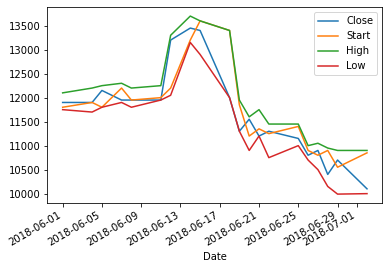

In [5]:
# 선 그래프 
df1.plot()

<AxesSubplot:xlabel='Date'>

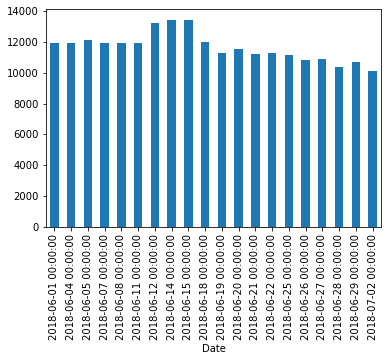

In [6]:
# 당초 막대 그래프내용이 거꾸로 되어있어서 순서를 변경하는 과정
df2 = df1.sort_index()
df2.Close.plot(kind='bar')

In [7]:
# Q. 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.

<AxesSubplot:xlabel='Date'>

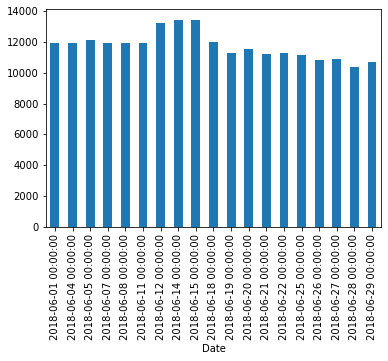

In [8]:
# 불린 인덱싱을 사용한 경우
df2.loc[df2.index<'2018-07-01'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

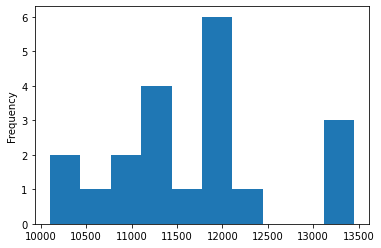

In [9]:
df2.Close.plot(kind='hist')

In [10]:
df.rename(columns = {'Volumn':'Volume'},inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

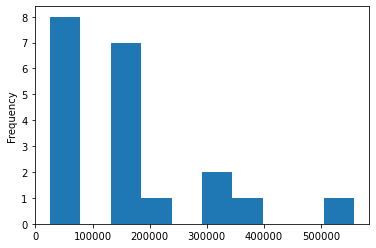

In [11]:
df.Volume.plot(kind='hist')

In [12]:
df.Volume.describe()
# 평균이 중앙값보다 더 크가 > 오른쪽으로 치우친 그래프
# 이것은 빈도그래프임

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

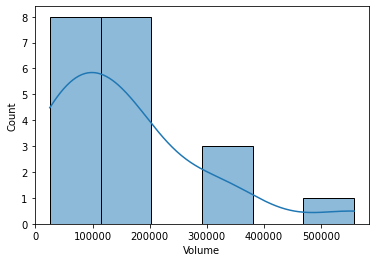

In [13]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

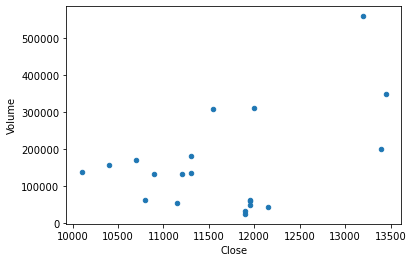

In [14]:
#산점도
df.plot(x='Close',y='Volume',kind='scatter')
# 두 변수간의 간격을 시각화 가능

In [15]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

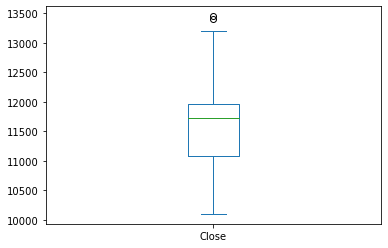

In [16]:
# Box Plot (종가의 데이터 분포도) #박스는 1분위와 3분위, 맨 위와 맨 아래는 최대값과 최솟값
df.Close.plot(kind='box')

#### Box plot 의미 해석
- IQR(inter quartile Range) : 제 3 사분위수(Q3) - 제 1사분위수(Q1) (박스의 제일 위쪽과 아래쪽의 차이)
- lower whisker: Q1(1사 분기수) - 1,5 * IQR 이내인 값 중에서 최솟값
- upper whisker: Q3 + 1.5 * IQR 이내의 값 중에서 최대값
- 이상치 : lower whisker, upper whisker를 벗어나는 값 

--- 이 가격에서 벗어나는 숫자들은 이상치를 벗어난다는 것을 의미한다.(맨 위에 있는 눈모양)
 - 이상치 처리를 통해서 불필요한 내용들을 걸러낼 수 있음.

In [17]:
# Close 컬럼의 이상치를 구하세요

In [18]:
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
upper_whisper_check = Q3 + 1.5 * IQR
print(upper_whisper_check,'\n')
print(df.Close.sort_values(ascending=False)[:5])
print('upper_whisper_check 13200을 벗어나는 값 선택:')
df.Close.loc[df.Close > Q3 + 1.5 * IQR]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64
upper_whisper_check 13200을 벗어나는 값 선택:


11    13400
12    13450
Name: Close, dtype: int64

In [19]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

<AxesSubplot:>

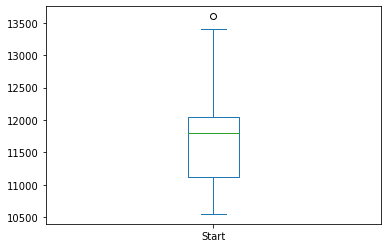

In [20]:
df.Start.plot(kind='box')

In [21]:
T1 = df.Start.quantile(.25)
T3 = df.Start.describe()['75%']
IQR = T3-T1
upper_whisper = Q3 + 1.5*IQR
print(upper_whisper)
print(df.Start.sort_values(ascending=False)[:5])
df.Start.loc[df.Start > T3 +1.5*IQR]

13350.0
11    13600
10    13400
12    13200
16    12200
13    12200
Name: Start, dtype: int64


11    13600
Name: Start, dtype: int64

In [22]:
T1 = df.Start.quantile(.25)
T3 = df.Start.describe()['75%']
IQR = T3-T1
upper_whisper_check = Q3 + 1.5 *IQR
print(upper_whisper_check)
print(df.Start.sort_values(ascending=False)[:5])
print('upper_whisper_check 13200을 벗어나는 값 선택:')
df.Start.loc[df.Start > T3 + 1.5*IQR]

13350.0
11    13600
10    13400
12    13200
16    12200
13    12200
Name: Start, dtype: int64
upper_whisper_check 13200을 벗어나는 값 선택:


11    13600
Name: Start, dtype: int64

#### [과제] df_ep 데이터 프레임으로 다음을 수행하세요.

- 선 그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
-  box plot

In [23]:
df5 = pd.read_excel('./dataset/df_ep.xlsx')
df5.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:>

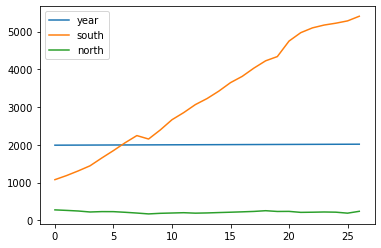

In [24]:
df5.plot()

<AxesSubplot:>

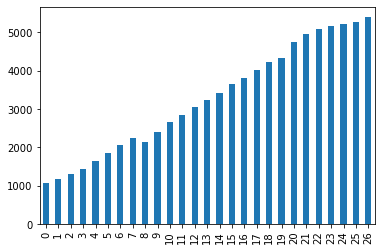

In [25]:
df5.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

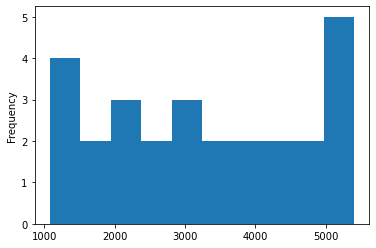

In [26]:
df5.south.plot(kind='hist')

<AxesSubplot:>

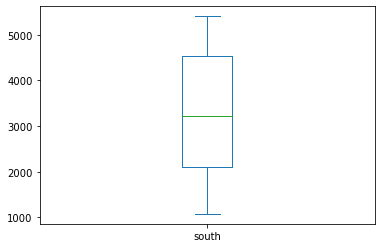

In [27]:
df5.south.plot(kind='box')

In [28]:
# [과제] df_auto 의 각 칼럼을 시각화해서 탐색한후 인사이트를 기술하세요(5개이상)

In [29]:
df6 = pd.read_excel('./dataset/auto-mpg.xlsx')
df6

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [30]:
df6.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [31]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [32]:
df6 = df6.copy()
df6['horsepower'].replace('?',np.nan,inplace=True)
df6.dropna(subset=['horsepower'],axis=0,inplace=True)   
df6['horsepower']=df6['horsepower'].astype('int')
df6['mpg']=df6['mpg'].astype('int')
df6['displacement']=df6['displacement'].astype('int')
df6['acceleration']=df6['acceleration'].astype('int')

In [33]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int32 
 1   cylinders     392 non-null    int64 
 2   displacement  392 non-null    int32 
 3   horsepower    392 non-null    int32 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    int32 
 6   model year    392 non-null    int64 
 7   origin        392 non-null    int64 
 8   car name      392 non-null    object
dtypes: int32(4), int64(4), object(1)
memory usage: 24.5+ KB


### 자동차 displacement(배기량)에 영향을 주는요소는?
 1. 실린더의 개수
 2. 무게

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

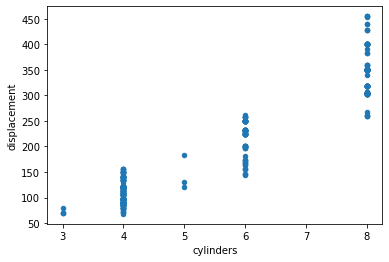

In [34]:
# 자동차의 배기량과 실린더간에는 연관성이 크다 
df6.plot(x='cylinders',y='displacement',kind='scatter')

<AxesSubplot:xlabel='weight', ylabel='displacement'>

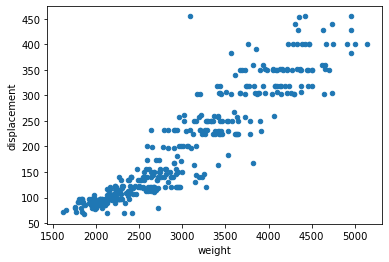

In [35]:
#자동차의 배기량과 무게와는 연관성이 크다.( 무게가 클수록 배기량이 커질 수 밖에 없다.)
df6.plot(x='weight',y='displacement',kind='scatter')

<AxesSubplot:xlabel='weight', ylabel='cylinders'>

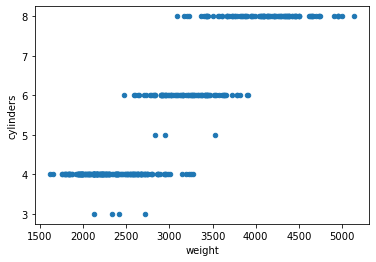

In [36]:
# 그러면 실린더의 갯수와 무게와의 관계는?

df6.plot(x='weight',y='cylinders',kind='scatter')

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

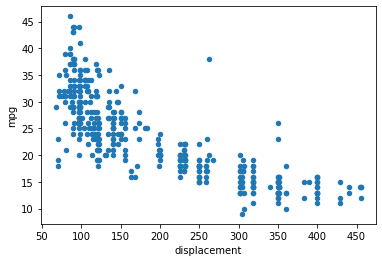

In [37]:
# 배기량과 마일당 속도와는 반비례(배기량이 커질 수록 오히려 마일이 )
df6.plot(x='displacement',y='mpg',kind='scatter')

<AxesSubplot:xlabel='weight', ylabel='mpg'>

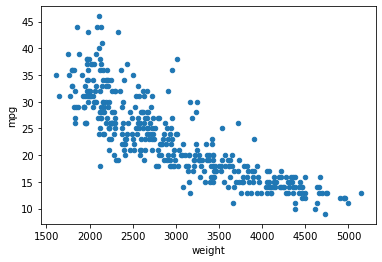

In [38]:
# 무게와 마일과는 반비례 (차체의 무게가 무거울수록 마일은 줄어든다)
df6.plot(x='weight',y='mpg',kind='scatter')

In [39]:
# displacement(배기량) 과 무게와의 관계는 앞에서 다뤘으므로 생략함

<AxesSubplot:ylabel='Frequency'>

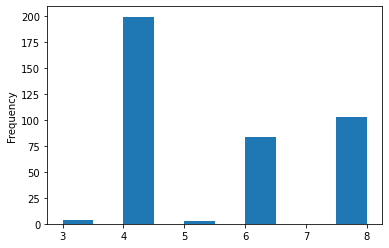

In [40]:
# 미국에서 주로 생산되었던 엔진은 4기통 엔진이 많았음
df6.cylinders.plot(kind='hist')

<AxesSubplot:xlabel='cylinders', ylabel='model year'>

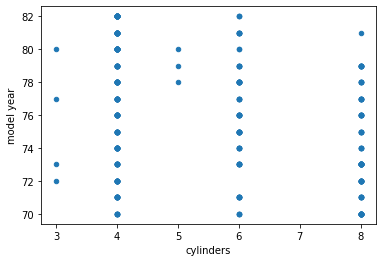

In [41]:
# 하지만 자동차 출시년도와 실린더와는 특별한 인사이트를 찾기 어렵다.
df6.plot(x='cylinders',y='model year',kind='scatter')

(array([1., 0., 3., 1., 1., 2., 1., 1., 2., 0., 4., 1., 3., 4., 1., 2., 3.,
        0., 3., 1., 3., 0., 2., 3., 2., 1., 1., 1., 2., 1.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ,
        21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. , 39.8,
        41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <BarContainer object of 30 artists>)

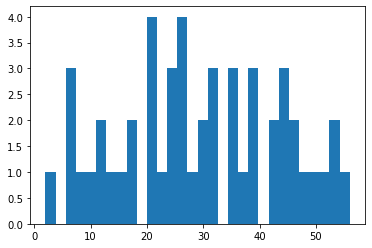

In [42]:
import matplotlib.pyplot as pit
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size=50)
pit.hist(data, bins=30)

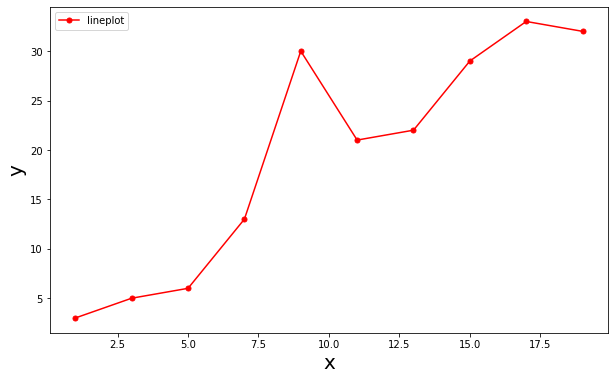

In [43]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

pit.figure(figsize=(10,6))
pit.plot(x,y,color = 'red',marker='o',markersize=5)
pit.xlabel('x',size=20)
pit.ylabel('y',size=20)
pit.legend(labels=['lineplot'])

Text(0.5, 1.0, 'Line Graph')

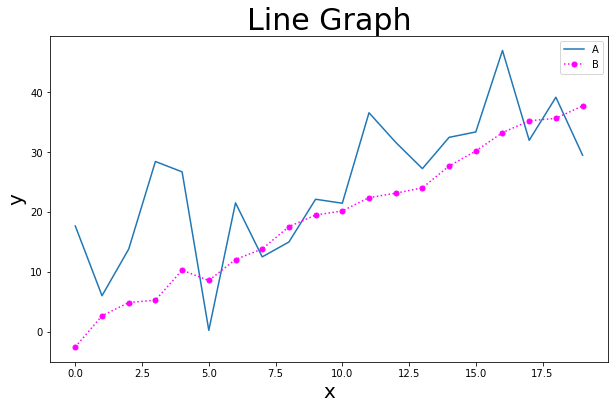

In [44]:
import numpy as np
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

pit.figure(figsize=(10,6))
pit.plot(x,y1)
pit.plot(x,y2,color='magenta',marker='o', markersize=5, linestyle='dotted')
pit.xlabel('x',size=20)
pit.ylabel('y',size=20)
pit.legend(labels=['A','B'])
pit.title('Line Graph',size=30)

Text(0, 0.5, 'y')

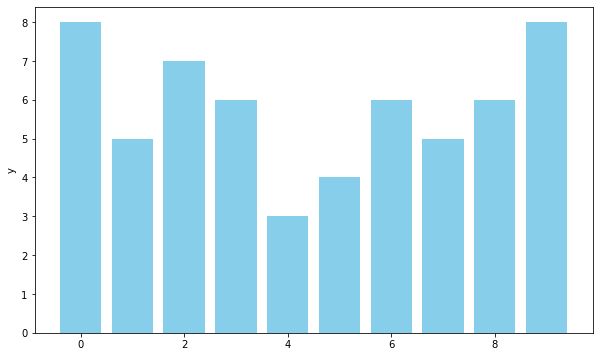

In [45]:
# 막대그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
pit.figure(figsize=(10,6))
pit.bar(x,y,width=0.8,color='skyblue')
pit.ylabel('x')
pit.ylabel('y')

In [46]:
import pandas as pd
df = pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


In [47]:
# Q. movie.csv에서 x축 movieNm, y축 salesAmt로 막대그래프를 그리세요.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

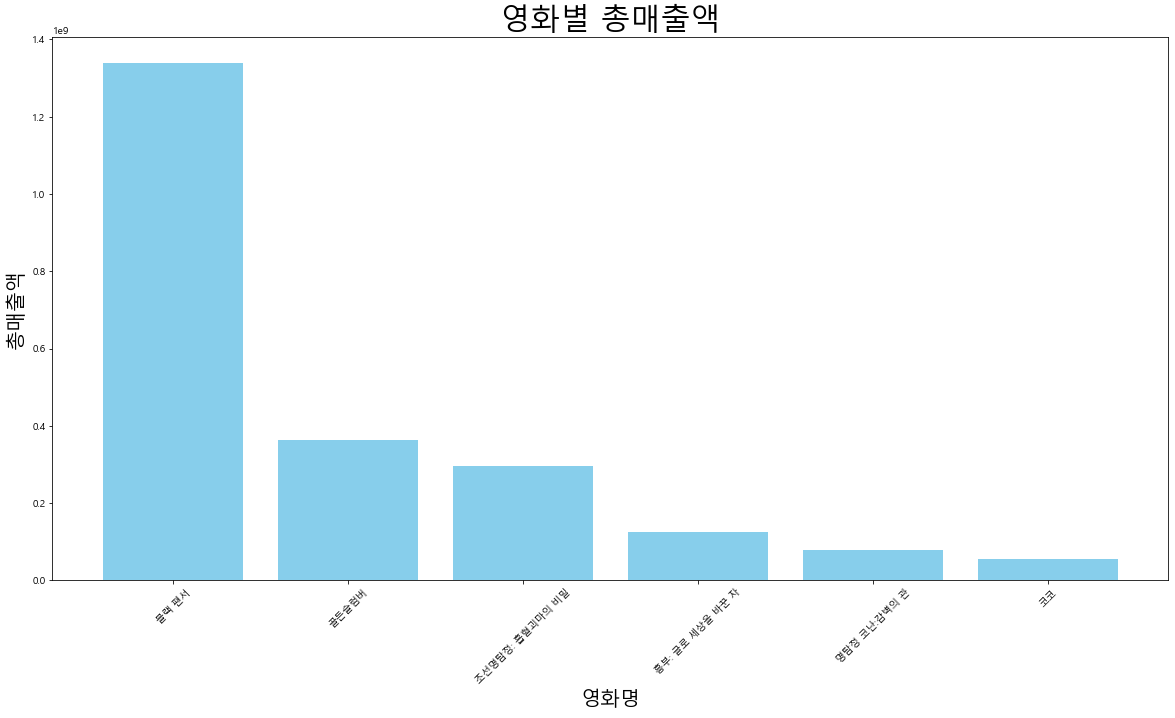

In [48]:
import matplotlib as mpl

mpl.rc('font', family = 'Malgun Gothic') # 한글 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리
pit.figure(figsize=(20,10))
pit.bar(df.movieNm,df.salesAmt,color='skyblue')
pit.title('영화별 총매출액', size=30)
pit.xlabel('영화명',size=20)
pit.ylabel('총매출액',size=20)
pit.xticks(rotation=45)

Text(0, 0.5, 'mpg')

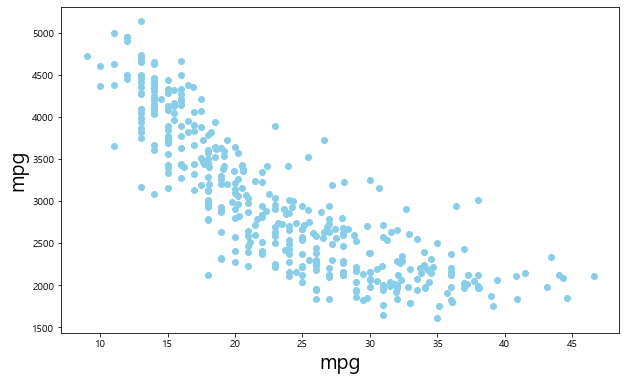

In [49]:
# scatter plot
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
x = df_auto.mpg
y = df_auto.weight
pit.figure(figsize=(10,6))
pit.scatter(x,y,color='skyblue')
pit.xlabel('mpg',size=20)
pit.ylabel('mpg',size=20)

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

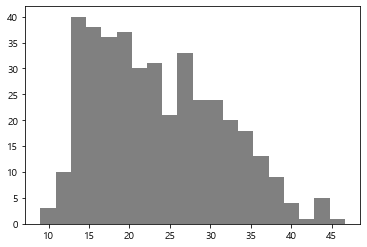

In [50]:
#histogram
pit.hist(x,bins=20,color='gray')

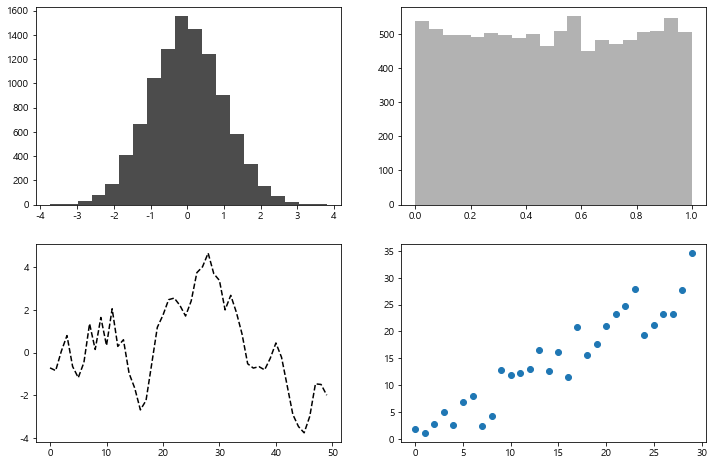

In [51]:
fig = pit.figure(figsize=(12,8))
#figure가 2 *2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
np.random.seed(0)
ax1.hist(np.random.randn(10000),bins=20,color='k',alpha=0.7)
ax2.hist(np.random.rand(10000),bins=20,color='k',alpha=0.3)
ax3.plot(np.random.randn(50).cumsum(),'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

In [52]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

In [53]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [54]:
# Q. t3에서 age열을 범주화 한 후 age_cat 열을 추가하세요

In [55]:
def age_category(age):
    cat =''
    if age < 10: cat='Child'
    elif age < 20: cat= 'Teenage'
    elif age < 30: cat= '20s'
    elif age < 40: cat= '30s'
    elif age < 50: cat= '40s'
    elif age < 60: cat= '50s'
    else: cat='Eldery'
    return cat
t3['age_cat'] = t3.age.apply(lambda x: age_category(x))
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s


         pclass  survived      age  sibsp  parch       fare    body  Ratio
age_cat                                                                   
20s         838       127  8402.00    112     77  9198.3038  5125.0    344
30s         488        98  7855.50     80     73  9578.5332  5020.0    232
40s         250        52  5958.50     50     68  5723.5168  3429.0    135
50s         101        32  3751.50     29     21  4384.9541  1889.0     70
Child       216        50   330.17    135    114  2403.4248     4.0     82


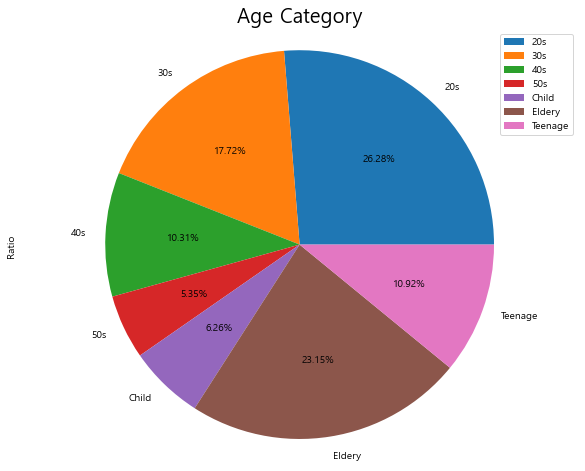

In [56]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
print(df_age_cat.head())

df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10,8),
                     autopct = '%.2f%%',
                     startangle=0)
pit.title('Age Category',size=20)
pit.axis('equal')
pit.legend(labels=df_age_cat.index, loc='best')